In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/drive/MyDrive/mini/TrafficTwoMonth.csv')

In [7]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [8]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [10]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [9]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

In [14]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,5,13,2,2,24,41,3
1,12:15:00 AM,10,5,14,1,1,36,52,3
2,12:30:00 AM,10,5,10,2,2,32,46,3
3,12:45:00 AM,10,5,10,2,2,36,50,3
4,1:00:00 AM,10,5,11,2,1,34,48,3
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,4,16,3,1,36,56,3
5948,11:00:00 PM,9,4,11,0,1,30,42,3
5949,11:15:00 PM,9,4,15,4,1,25,45,3
5950,11:30:00 PM,9,4,16,5,0,27,48,3


In [15]:
df['Traffic Situation'].value_counts()

,count
Traffic Situation,
3,3610
0,1137
2,834
1,371


In [16]:
y = df['Traffic Situation']
x = df.drop(['Traffic Situation', 'Time'], axis=1)

In [17]:
y.dtype

dtype('int64')

In [18]:
x.dtypes

,0
Date,int64
Day of the week,int64
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [22]:
x_train

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,0.886270,0.904059,-1.040253,-0.883774,-0.958576,1.320322,-0.968588
1,-1.122871,-1.086334,-1.151855,0.582576,0.729183,-0.320350,-0.700989
2,-0.006682,-1.086334,0.923939,1.100111,2.015095,-0.411499,1.332766
3,-0.788014,0.406461,-0.772409,-0.279983,-0.154881,0.864580,-0.540430
4,-1.680966,1.401657,1.169464,-0.193727,0.005858,-0.229202,0.851087
...,...,...,...,...,...,...,...
4756,0.216556,1.401657,1.682832,0.237552,0.648814,-1.231835,1.297086
4757,-1.569347,0.406461,-1.218816,-1.056286,-1.038946,-0.229202,-1.468107
4758,-1.569347,0.406461,0.254328,0.927599,0.086227,0.135392,0.440768
4759,-1.346109,-0.588736,-1.040253,-0.625006,-0.958576,1.776064,-0.825869


In [23]:
x_test

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,0.551413,-0.091137,-1.040253,-0.970030,-1.038946,-0.411499,-1.343228
1,0.774651,-1.086334,1.147143,-0.193727,-0.235251,-0.046905,0.815407
2,1.555983,-1.086334,-0.303681,-0.452495,-0.958576,0.682283,-0.415550
3,1.332746,-0.588736,0.321290,1.186367,1.773987,-1.140686,0.672687
4,0.886270,0.904059,0.856978,0.410064,0.809553,-1.231835,0.708367
...,...,...,...,...,...,...,...
1186,0.328175,0.406461,-0.147438,-0.452495,0.086227,0.864580,-0.023071
1187,1.332746,-0.588736,1.437308,1.617646,0.729183,-1.687577,1.314926
1188,-1.569347,0.406461,-0.437603,-0.538750,-0.154881,1.502619,-0.201470
1189,-0.676395,0.904059,-1.263457,-0.970030,-1.038946,1.411471,-1.164828


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dropout

In [26]:
model = Sequential([
    Dense(6, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(6, activation='relu',),
    Dense(4)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [39]:
model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=256)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9598 - loss: 0.1367 - val_accuracy: 0.9381 - val_loss: 0.1679
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9583 - loss: 0.1279 - val_accuracy: 0.9391 - val_loss: 0.1679
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9627 - loss: 0.1368 - val_accuracy: 0.9381 - val_loss: 0.1671
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9595 - loss: 0.1262 - val_accuracy: 0.9391 - val_loss: 0.1670
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9626 - loss: 0.1277 - val_accuracy: 0.9381 - val_loss: 0.1658
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9590 - loss: 0.1264 - val_accuracy: 0.9412 - val_loss: 0.1649
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9575 - loss: 0.1436 - val_accuracy: 0.9391 - val_loss: 0.1638
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9602 - loss: 0.1285 - val_accuracy: 0.9

In [40]:
model.evaluate(x_train, y_train)

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9779 - loss: 0.0894


[0.0881793275475502, 0.9768956303596497]

In [41]:
model.evaluate(x_test, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0699


[0.07768101245164871, 0.9806885123252869]

In [42]:
y_hat = model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<Axes: >

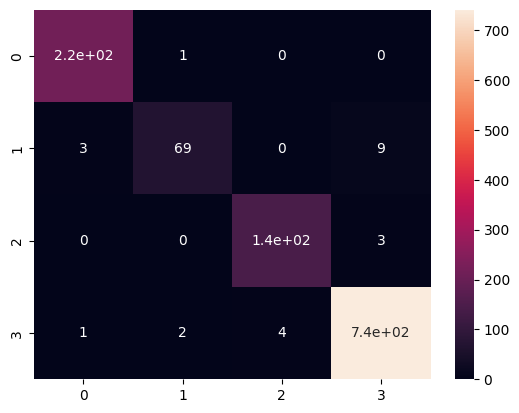

In [44]:
cm = confusion_matrix(y_test, y_hat.argmax(axis=1))
cm
sns.heatmap(cm, annot=True)

In [45]:
report = classification_report(y_test, y_hat.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       216
           1       0.96      0.85      0.90        81
           2       0.97      0.98      0.98       146
           3       0.98      0.99      0.99       748

    accuracy                           0.98      1191
   macro avg       0.97      0.95      0.96      1191
weighted avg       0.98      0.98      0.98      1191



In [46]:
model.save('traffic_model.h5')

In [47]:
loaded_model = tf.keras.models.load_model('traffic_model.h5')